# Comparison and rationale for the strategy: 2002-2014

In [2]:
# Importing the modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

In [3]:
# Loading SPY data (2002-2014)
start_date = "2002-06-21"
end_date = "2014-10-30"
spy_data = yf.download("SPY", start=start_date, end=end_date)
spy_data['Daily Return'] = spy_data['Adj Close'].pct_change()
spy_data = spy_data.dropna()

[*********************100%***********************]  1 of 1 completed


In [4]:
# We load every factor data from the Excel file + rename each column
value = pd.read_excel('case_study_data (4).xlsx', sheet_name='Value', skiprows=3, usecols="A:B")
value.rename(columns={'RI(USD)': 'Value'}, inplace=True)
mid_cap = pd.read_excel('case_study_data (4).xlsx', sheet_name='Mid Cap', skiprows=3, usecols="A:B")
mid_cap.rename(columns={'RI(USD)': 'Mid_cap'}, inplace=True)
momentum = pd.read_excel('case_study_data (4).xlsx', sheet_name='Momentum', skiprows=3, usecols="A:B")
momentum.rename(columns={'RI(USD)': 'Momentum'}, inplace=True)
low_vol = pd.read_excel('case_study_data (4).xlsx', sheet_name='Low Volatility ', skiprows=3, usecols="A:B")
low_vol.rename(columns={'RI(USD)': 'Low Vol'}, inplace=True)
low_investment = pd.read_excel('case_study_data (4).xlsx', sheet_name='Low Investment', skiprows=3, usecols="A:B")
low_investment.rename(columns={'RI(USD)': 'Low Investment'}, inplace=True)
high_profitability = pd.read_excel('case_study_data (4).xlsx', sheet_name='High Profitability', skiprows=3, usecols="A:B")
high_profitability.rename(columns={'RI(USD)': 'High Profitability'}, inplace=True)

In [5]:
# Merge those factors into one table only
six_factors = value.merge(mid_cap, on='date')\
                    .merge(momentum, on='date')\
                    .merge(low_vol, on='date')\
                    .merge(low_investment, on='date')\
                    .merge(high_profitability, on='date')

six_factors.set_index('date', inplace=True)
daily_returns = six_factors.pct_change().dropna()
daily_returns

,Value,Mid_cap,Momentum,Low Vol,Low Investment,High Profitability
date,,,,,,
2002-06-24,-0.005837,-0.007240,-0.004528,-0.005404,-0.006265,-0.004087
2002-06-25,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603
2002-06-26,-0.008688,-0.007918,-0.003178,-0.001011,-0.004044,-0.002254
2002-06-27,0.015050,0.013252,0.014423,0.014853,0.014373,0.015489
2002-06-28,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886
...,...,...,...,...,...,...
2025-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-01-10,-0.013725,-0.015269,-0.015708,-0.016301,-0.015269,-0.012637
2025-01-13,0.006672,0.007559,0.004877,0.005707,0.009291,0.006336


#### Integrating EW and GMV from 2002 to 2014

In [7]:
daily_returns_in_sample = daily_returns.loc["2002-06-21":"2014-10-30"]
daily_returns_in_sample

,Value,Mid_cap,Momentum,Low Vol,Low Investment,High Profitability
date,,,,,,
2002-06-24,-0.005837,-0.007240,-0.004528,-0.005404,-0.006265,-0.004087
2002-06-25,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603
2002-06-26,-0.008688,-0.007918,-0.003178,-0.001011,-0.004044,-0.002254
2002-06-27,0.015050,0.013252,0.014423,0.014853,0.014373,0.015489
2002-06-28,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886
...,...,...,...,...,...,...
2014-10-24,0.008402,0.006719,0.007443,0.008373,0.007379,0.008549
2014-10-27,-0.000065,0.000354,-0.001248,0.000854,0.000066,0.002156
2014-10-28,0.011084,0.012985,0.015950,0.008493,0.010644,0.008669


In [8]:
# Integrating the Equally Weighted PTF
ew = np.ones(len(daily_returns_in_sample.columns)) / len(daily_returns_in_sample.columns)
daily_returns_in_sample

,Value,Mid_cap,Momentum,Low Vol,Low Investment,High Profitability
date,,,,,,
2002-06-24,-0.005837,-0.007240,-0.004528,-0.005404,-0.006265,-0.004087
2002-06-25,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603
2002-06-26,-0.008688,-0.007918,-0.003178,-0.001011,-0.004044,-0.002254
2002-06-27,0.015050,0.013252,0.014423,0.014853,0.014373,0.015489
2002-06-28,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886
...,...,...,...,...,...,...
2014-10-24,0.008402,0.006719,0.007443,0.008373,0.007379,0.008549
2014-10-27,-0.000065,0.000354,-0.001248,0.000854,0.000066,0.002156
2014-10-28,0.011084,0.012985,0.015950,0.008493,0.010644,0.008669


In [9]:
# Integrating the GMV ptf
from scipy.optimize import minimize

In [10]:
V = daily_returns_in_sample.cov()
def portfolio_variance(weights, V):
    return np.dot(weights.T, np.dot(V, weights))

bounds = tuple((0, 1) for _ in range(len(V)))
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
initial_weights = np.ones(len(V)) / len(V)
result = minimize(portfolio_variance, initial_weights, args=(V,), method='SLSQP', bounds=bounds, constraints=constraints)
gmv_weights = result.x

In [11]:
gmv_weights # still extremely similar to EW, and was the same with semi var

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

#### Integrating an optimized FRP (with our views)

<b><u>Rationale based on a paper: "A Study of Low-Volatility Portfolio Construction Methods", as of Summer 2014: (TZEE-MAN CHOW et al)</b></u>
- Over extended period (1967 to 2012) , SR of long-only low vol ptf in the US : 0.5 > 0.3 for cap-weighted
- Higher SR = result of less variability in the time series of returns + equity ptf volatility driven by its mkt beta
- Outperformance of low vol ptf because -> low beta stocks deliver higher returns than high beta stocks bc they tend to be value and small stocks
- Low-vol ptf have betas below 0.7 for US -> less sensitive to mkt movements compared to CW -> ptf short on mkt factor risk
- And low vol ptf incorporate factors with attractive premia (value & BAB) -> improved risk-return tradeoff for investors -> form of diversification
- Low beta stocks are value stocks -> are stable, less volatile companies that do not attract speculative attention

- But they also warn: 
- " We know that historical excess return can be a poor predictor of future outperformance because factor loadings and the sizes of factor premia can be time-varying. As more low-volatility stocks are bid up in price due to increased flows into the strategy, low-volatility portfolios may lose 
their value characteristics, which would reduce their forward-looking returns. Also, the likelihood of rising interest rates may suggest that the return to duration risk may be significantly lower than history would suggest. This would further detract from forward low-volatility performance."

- So we decided to also add our personal tilt : 20% quality in highly profitable companies (big cashflows + high margin, better to face drawdowns)

In [14]:
# Our strategy: Optimized FRP: we impose some constraints in order to limit the drawdown + invest in top quality companies

def risk_contribution(weights, cov_matrix):
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    marginal_contributions = np.dot(cov_matrix, weights)
    risk_contrib = weights * marginal_contributions / portfolio_vol
    total_risk_contrib = np.sum(risk_contrib)
    normalized_contrib = risk_contrib / total_risk_contrib  # we normalize so sum = 1
    return normalized_contrib

def objective(weights, cov_matrix, N):
    risk_contrib = risk_contribution(weights, cov_matrix)
    target_contrib = 1 / N  # being the equal target
    return np.sum((risk_contrib - target_contrib) ** 2)  # we min the difference between our risk contrib and the target

N = len(daily_returns_in_sample.columns) 
initial_weights = np.ones(N) / N
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# And here we add our views: want to limit the drawdowns (increase low vol, decrease momentum & mid caps), invest in quality (companies bringing cf)
factor_constraints = [
    {'type': 'ineq', 'fun': lambda weights: weights[3] - 0.25},  # we impose at least 25% low vol -> to reduce possible drawdowns if client risk averse
    {'type': 'ineq', 'fun': lambda weights: weights[5] - 0.20},  # we impose at least 20% quality -> invest 20% in high profitability / companies with great fundamentals
]
constraints.extend(factor_constraints)

bounds = tuple((-0, 1) for _ in range(N))
bounds = list(bounds)
bounds[3] = (0.25, 1)  
bounds[5] = (0.20, 1)

result = minimize(objective, initial_weights, args=(V, N), method='SLSQP', bounds=bounds, constraints=constraints)
frp_weights = result.x
frp_weights

array([0.13672518, 0.13400082, 0.13663591, 0.25      , 0.1426381 ,
       0.2       ])

In [15]:
frp_risk_contrib = risk_contribution(frp_weights, V)
frp_risk_contrib # risk contrib are not perfect here but maximally tend to the target (1/N) -> max ENB

array([0.14316257, 0.14413234, 0.14343949, 0.22620673, 0.1413889 ,
       0.20166997])

<b><u>Rationale behind it: </b></u>
- The idea being that FRP -> max ENB: and those funds perform better in bear markets than funds with smaller ENB.
- That's why we use FRP here + we impose some views on it to limit possible drawdowns

In [17]:
daily_returns_in_sample['EW'] = daily_returns_in_sample.dot(ew)

In [18]:
daily_returns_in_sample['GMV'] = daily_returns_in_sample.iloc[:, :6].dot(gmv_weights)
daily_returns_in_sample['FRP'] = daily_returns_in_sample.iloc[:, :6].dot(frp_weights)

#### Sharpe Ratio comparison

In [20]:
def SR(daily_ret):
    daily_ret_avg = daily_ret.mean()
    daily_ret_std = daily_ret.std()
    return (daily_ret_avg / daily_ret_std) * np.sqrt(252)

In [21]:
sharpe_ew = SR(daily_returns_in_sample['EW'])
sharpe_gmv = SR(daily_returns_in_sample['GMV'])
sharpe_frp = SR(daily_returns_in_sample['FRP'])
sharpe_spy = SR(spy_data['Daily Return'])
print("Sharpe Ratio EW:", sharpe_ew)
print("Sharpe Ratio GMV:", sharpe_gmv)
print("Sharpe Ratio FRP:", sharpe_frp)
print("Sharpe Ratio SPY:", sharpe_spy)

Sharpe Ratio EW: 0.6356117596857364
Sharpe Ratio GMV: 0.6356117596857364
Sharpe Ratio FRP: 0.6401683865784009
Sharpe Ratio SPY: 0.4746935875027608


- Better SR than the 2 other strategies + than the benchmark over the in-sample period.

#### Cumulative performance comparison

In [24]:
spy_data['Daily Return'].mean()*252

0.0958863645446389

In [25]:
daily_returns_in_sample['GMV_Cumul'] = (1 + daily_returns_in_sample['GMV']).cumprod()
daily_returns_in_sample['FRP_Cumul'] = (1 + daily_returns_in_sample['FRP']).cumprod()
daily_returns_in_sample['EW_Cumul'] = (1 + daily_returns_in_sample['EW']).cumprod()
spy_data['Cumul'] = (1 + spy_data['Daily Return']).cumprod()

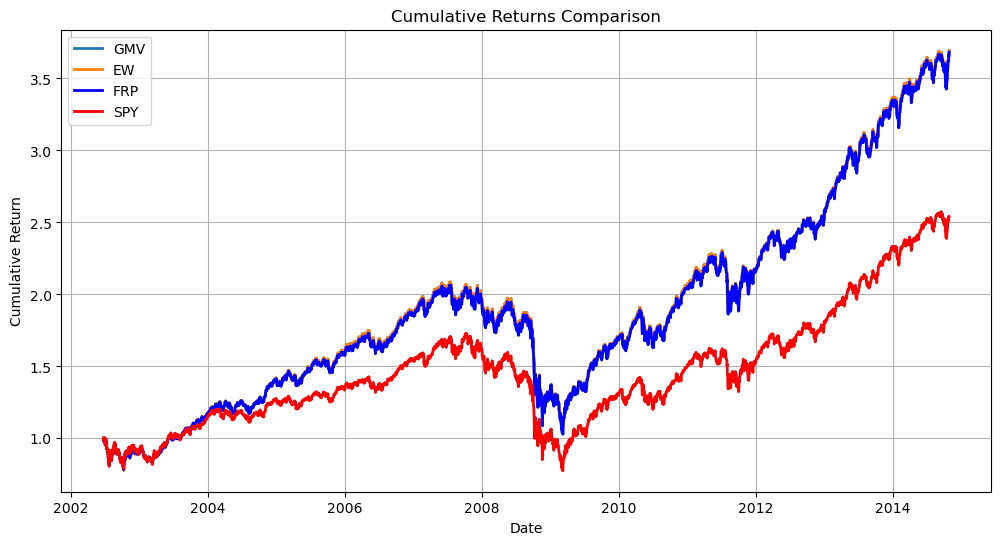

In [26]:
# We plot the cumul returns of the 3 strategies + the benchmark (cumul returns of the strat all overlay)
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_in_sample.index, daily_returns_in_sample['GMV_Cumul'], label='GMV', linestyle='-', linewidth=2)
plt.plot(daily_returns_in_sample.index, daily_returns_in_sample['EW_Cumul'], label='EW', linestyle='-', linewidth=2)
plt.plot(daily_returns_in_sample.index, daily_returns_in_sample['FRP_Cumul'], label='FRP', linestyle='-', linewidth=2, color = "blue")
plt.plot(spy_data.index, spy_data['Cumul'], label='SPY', linestyle='-', linewidth=2, color='red')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

<b><u>Comments:</b></u>
- The 3 Strategies outperform the benchmark over the 12-year period

#### Drawdown comparison

In [29]:
def drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown

In [30]:
daily_returns_in_sample['GMV_Drawdown'] = drawdown(daily_returns_in_sample['GMV_Cumul'])
daily_returns_in_sample['FRP_Drawdown'] = drawdown(daily_returns_in_sample['FRP_Cumul'])
daily_returns_in_sample['EW_Drawdown'] = drawdown(daily_returns_in_sample['EW_Cumul'])
spy_data['SPY_Drawdown'] = drawdown(spy_data['Cumul'])

In [31]:
gmv_max_drawdown = daily_returns_in_sample['GMV_Drawdown'].min()
frp_max_drawdown = daily_returns_in_sample['FRP_Drawdown'].min()
ew_max_drawdown = daily_returns_in_sample['EW_Drawdown'].min()
spy_max_drawdown = spy_data['SPY_Drawdown'].min()
print(f"Max Drawdown (GMV): {gmv_max_drawdown:.2%}")
print(f"Max Drawdown (FRP): {frp_max_drawdown:.2%}")
print(f"Max Drawdown (EW): {ew_max_drawdown:.2%}")
print(f"Max Drawdown (SPY): {spy_max_drawdown:.2%}")

Max Drawdown (GMV): -50.57%
Max Drawdown (FRP): -50.17%
Max Drawdown (EW): -50.57%
Max Drawdown (SPY): -55.19%


<b><u>Comments:</b></u>
- We prevent a 5% loss with our FRP optimized during the 2008 financial crisis, compared to SPY.

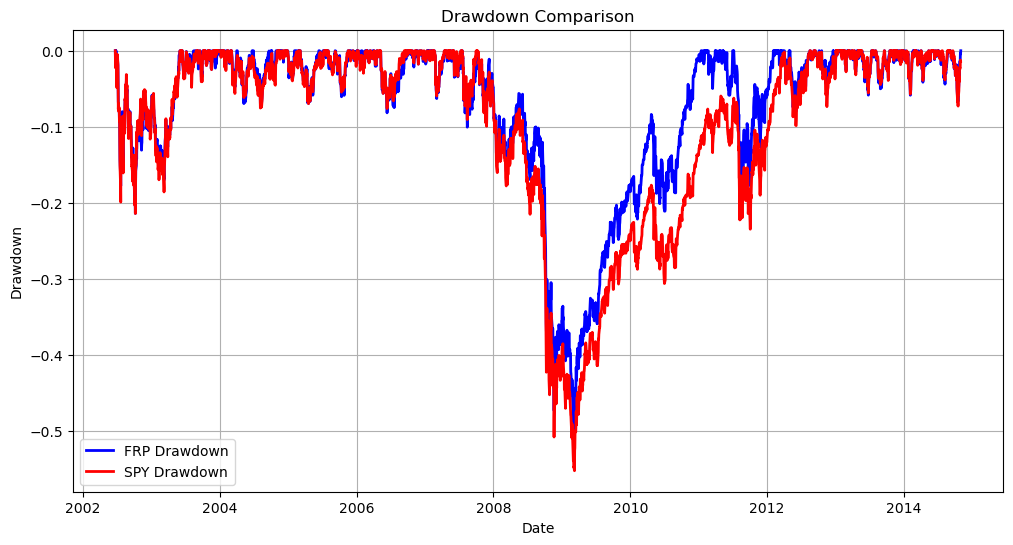

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_in_sample.index, daily_returns_in_sample['FRP_Drawdown'], label='FRP Drawdown', linestyle='-', linewidth=2, color = "blue")
plt.plot(spy_data.index, spy_data['SPY_Drawdown'] , label='SPY Drawdown', linestyle='-', linewidth=2, color='red')
plt.title('Drawdown Comparison')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

<b><u>Why choosing our FRP strategy at this point ?</b></u>
- Better SR than the 2 others + better than benchmark
- Smaller drawdowns (abs value) than benchmark over the period
- Better cumulative perf (2.5 vs 3.7 over the 12 yr period) compared to benchmark
- FPR so we max ENB and make risk_contrib converge towards the 1/N target -> better protection in bear market
- We added views on it: invest on low vol stocks (minimize the drawdown), on top quality stocks, and reduce exposure to big downside move

# Comparison 2014-2024 (Sharpe Ratio, Cumulative Perf and Drawdown)

- So we decided to implement this strategy (fixed weight) over the investment period of the client (2014-2024)

In [37]:
# Loading S&P500 data for 2014-2024
sp500 = pd.read_excel('case_study_data (4).xlsx', sheet_name='Risky asset', skiprows=1)
sp500.columns = ['Date', 'Price']
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500['Daily Return'] = sp500['Price'].pct_change()
sp500 = sp500.dropna()

In [38]:
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod() 

In [39]:
daily_returns_out_of_sample = daily_returns.loc['2014-10-31':'2024-11-01']
daily_returns_out_of_sample

,Value,Mid_cap,Momentum,Low Vol,Low Investment,High Profitability
date,,,,,,
2014-10-31,0.011708,0.012954,0.015472,0.010977,0.011771,0.012255
2014-11-03,0.000589,0.001933,-0.001009,0.001085,0.001167,0.000946
2014-11-04,-0.002686,-0.005081,-0.004790,0.000633,-0.001309,-0.000368
2014-11-05,0.008523,0.007484,0.010597,0.006995,0.009722,0.005641
2014-11-06,0.003696,0.005427,0.005724,0.000923,0.002764,0.006613
...,...,...,...,...,...,...
2024-10-28,0.005581,0.005859,0.004126,0.004564,0.005924,0.002756
2024-10-29,-0.005922,-0.004116,-0.002218,-0.004573,-0.004336,-0.002383
2024-10-30,0.000612,-0.000922,-0.000964,-0.000474,0.000148,-0.000325


In [40]:
daily_returns_out_of_sample['FRP'] = daily_returns_out_of_sample.dot(frp_weights) # here we implement fixed weights based on in-sample
daily_returns_out_of_sample['FRP_Cumulative'] = (1 + daily_returns_out_of_sample['FRP']).cumprod()

#### Sharpe Ratio comparison

In [42]:
frp_sharpe = SR(daily_returns_out_of_sample['FRP'])
sp500_sharpe = SR(sp500['Daily Return'])
print(f"Sharpe Ratio (FRP Portfolio): {frp_sharpe:.2f}")
print(f"Sharpe Ratio (S&P 500): {sp500_sharpe:.2f}")

Sharpe Ratio (FRP Portfolio): 0.71
Sharpe Ratio (S&P 500): 0.78


<b><u>Comments:</b></u>
- Sharpe ratio lower than benchmark over this bullish decade, but still >70%

#### Cumulative Return Comparison

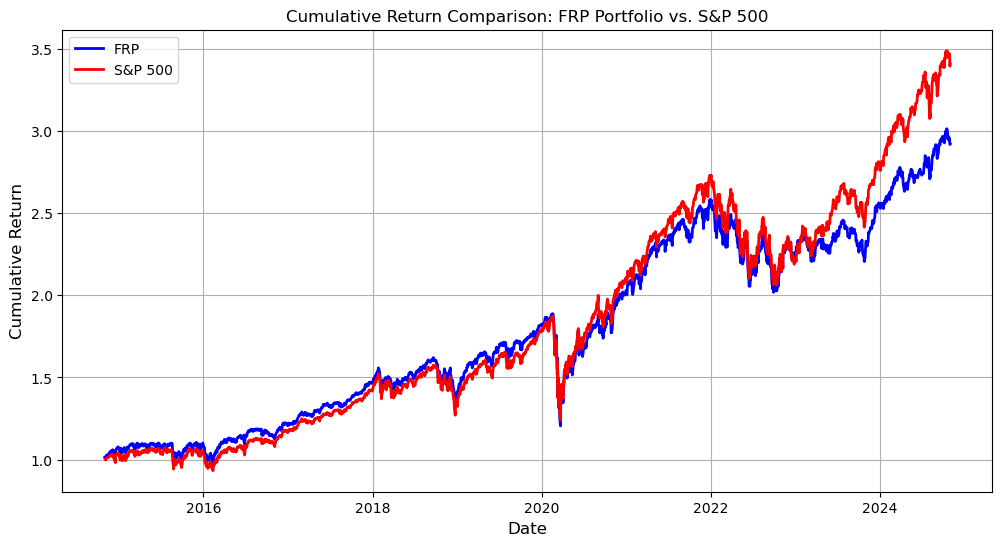

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_out_of_sample.index, daily_returns_out_of_sample['FRP_Cumulative'], label='FRP', color='blue', linewidth=2)
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='red', linewidth=2)

plt.title('Cumulative Return Comparison: FRP Portfolio vs. S&P 500')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

#### Drawdown Comparison

In [47]:
frp_max_drawdown = drawdown(daily_returns_out_of_sample['FRP_Cumulative']).min()
sp500_max_drawdown = drawdown(sp500['Cumulative Return']).min()
print(f"Max Drawdown (FRP Portfolio): {frp_max_drawdown:.2%}")
print(f"Max Drawdown (S&P 500): {sp500_max_drawdown:.2%}")

Max Drawdown (FRP Portfolio): -36.16%
Max Drawdown (S&P 500): -33.79%


- Here we suffer a bigger max loss than the benchmark during COVID, but impact limited.

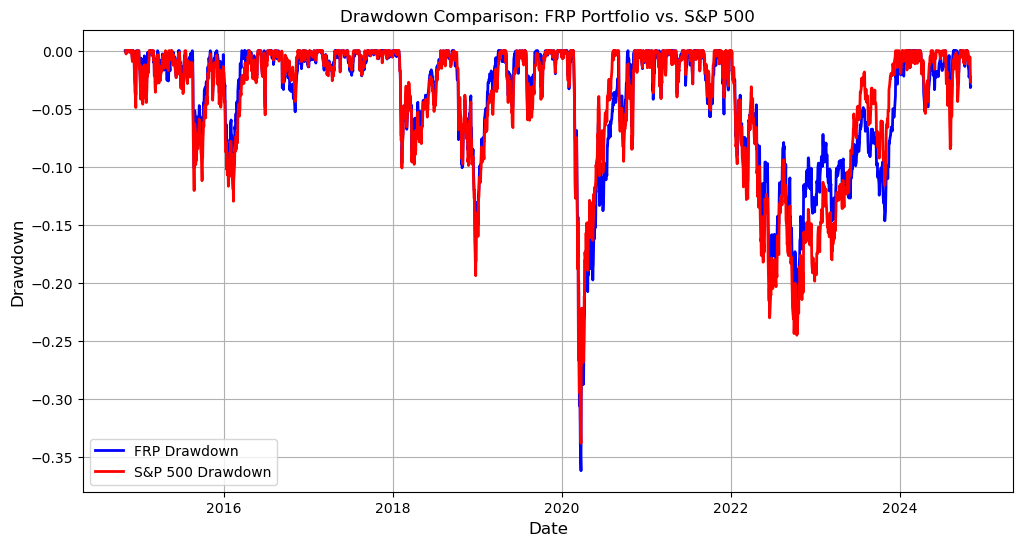

In [49]:
daily_returns_out_of_sample['FRP_Drawdown'] = drawdown(daily_returns_out_of_sample['FRP_Cumulative'])
sp500['SP500_Drawdown'] = drawdown(sp500['Cumulative Return'])

plt.figure(figsize=(12, 6))
plt.plot(daily_returns_out_of_sample.index, daily_returns_out_of_sample['FRP_Drawdown'], label='FRP Drawdown', linestyle='-', linewidth=2, color="blue")
plt.plot(sp500.index, sp500['SP500_Drawdown'], label='S&P 500 Drawdown', linestyle='-', linewidth=2, color="red")
plt.title('Drawdown Comparison: FRP Portfolio vs. S&P 500')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Drawdown', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

- We see here than unless completely unexpected crisis (COVID), drawdown seems more significant for the benchmark than our FRP.
- Our views have limited the downturn risk here, except during covid.

<b><u>Final Comments:</b></u>

- Strategy that performed pretty well in-sample as of 2014: bigger SR, smaller drawdown, bigger cumulative return
- Stategy that underperform out-of-sample (impossible to outperf), but is minimizing the downside over the 10 years (except covid) wrt S&P500
- I think that we can attain funding ratio of 1 wrt target with this strategy before 2024.

## GARCH Model: volatility estimation

In [54]:
from datetime import datetime
from arch import arch_model

#### First for S&P Historical

In [56]:
# GARCH function
def garch(returns, p=1, q=1):
    model = arch_model(returns, vol='Garch', p=p, q=q)
    model_fitted = model.fit(disp="off")
    volatility = model_fitted.conditional_volatility
    return volatility

In [57]:
returnsp500 = sp500['Daily Return'] 

In [58]:
# Rolling window GARCH estimation
window_size = 252  # Number of days in the rolling window (e.g., 252 trading days in a year)
rolling_volatility = []

# Loop over the data with a rolling window
for i in range(window_size, len(returnsp500)):
    window_data = returnsp500[i-window_size:i]  # Get the last `window_size` returns
    volatility = garch(window_data)  # Estimate GARCH volatility for the rolling window
    rolling_volatility.append(volatility[-1])  # Append the last volatility estimate for this window

# Convert the rolling volatility into a pandas Series
rolling_volatility_series = pd.Series(rolling_volatility, index=returnsp500.index[window_size:])
rolling_volatility_series

C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Date
2015-11-03    0.007791
2015-11-04    0.008738
2015-11-05    0.007941
2015-11-06    0.007485
2015-11-09    0.006966
                ...   
2024-10-28    0.006709
2024-10-29    0.006479
2024-10-30    0.006285
2024-10-31    0.006100
2024-11-01    0.006240
Length: 2265, dtype: float64

In [59]:
sp500['Daily Return'].std() # not annually in here, just daily

0.011214297539831284

In [60]:
target_vol = sp500['Daily Return'].std()

#initial_risky_allocation = 0.6  # play on that with LHP
adjusted_allocation = (target_vol / rolling_volatility_series) #* initial_risky_allocation
adjusted_allocation = adjusted_allocation[:len(returnsp500.index[window_size:])]
adjusted_allocation_df = pd.DataFrame(adjusted_allocation, columns=["Adjusted Risky Allocation"], index=returnsp500.index[window_size:])
adjusted_allocation_df

,Adjusted Risky Allocation
Date,
2015-11-03,1.439463
2015-11-04,1.283351
2015-11-05,1.412191
2015-11-06,1.498181
2015-11-09,1.609796
...,...
2024-10-28,1.671562
2024-10-29,1.730970
2024-10-30,1.784251


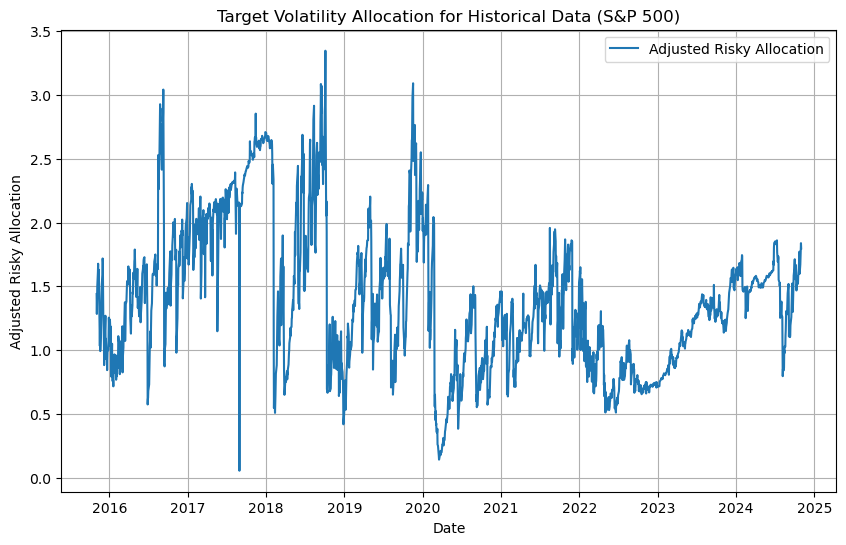

In [61]:
# Plot the adjusted risky allocation over time
plt.figure(figsize=(10, 6))
plt.plot(adjusted_allocation_df.index, adjusted_allocation_df["Adjusted Risky Allocation"], label="Adjusted Risky Allocation")
plt.title("Target Volatility Allocation for Historical Data (S&P 500)")
plt.xlabel("Date")
plt.ylabel("Adjusted Risky Allocation")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
#### Then for PSP Historical

In [63]:
returnsPSP = daily_returns_out_of_sample['FRP']

In [64]:
# Rolling window GARCH estimation
window_size = 252  # Number of days in the rolling window (e.g., 252 trading days in a year)
rolling_volatility = []

# Loop over the data with a rolling window
for i in range(window_size, len(returnsPSP)):
    window_data = returnsPSP[i-window_size:i]  # Get the last `window_size` returns
    volatility = garch(window_data)  # Estimate GARCH volatility for the rolling window
    rolling_volatility.append(volatility[-1])  # Append the last volatility estimate for this window

# Convert the rolling volatility into a pandas Series
rolling_volatility_series = pd.Series(rolling_volatility, index=returnsPSP.index[window_size:])
rolling_volatility_series

C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\33603\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_sl

date
2015-10-20    0.008001
2015-10-21    0.007251
2015-10-22    0.006654
2015-10-23    0.006589
2015-10-26    0.008881
                ...   
2024-10-28    0.005855
2024-10-29    0.006089
2024-10-30    0.006106
2024-10-31    0.005967
2024-11-01    0.005747
Length: 2359, dtype: float64

In [65]:
daily_returns_out_of_sample['FRP'].std() # not annually in here, just daily

0.01046964307380519

In [66]:
target_vol = daily_returns_out_of_sample['FRP'].std()

#initial_risky_allocation = 0.6  # play on that with LHP
adjusted_allocation = (target_vol / rolling_volatility_series) #* initial_risky_allocation
adjusted_allocation = adjusted_allocation[:len(returnsPSP.index[window_size:])]
adjusted_allocation_df = pd.DataFrame(adjusted_allocation, columns=["Adjusted Risky Allocation"], index=returnsPSP.index[window_size:])
adjusted_allocation_df

,Adjusted Risky Allocation
date,
2015-10-20,1.308602
2015-10-21,1.443988
2015-10-22,1.573546
2015-10-23,1.588881
2015-10-26,1.178852
...,...
2024-10-28,1.788047
2024-10-29,1.719482
2024-10-30,1.714706


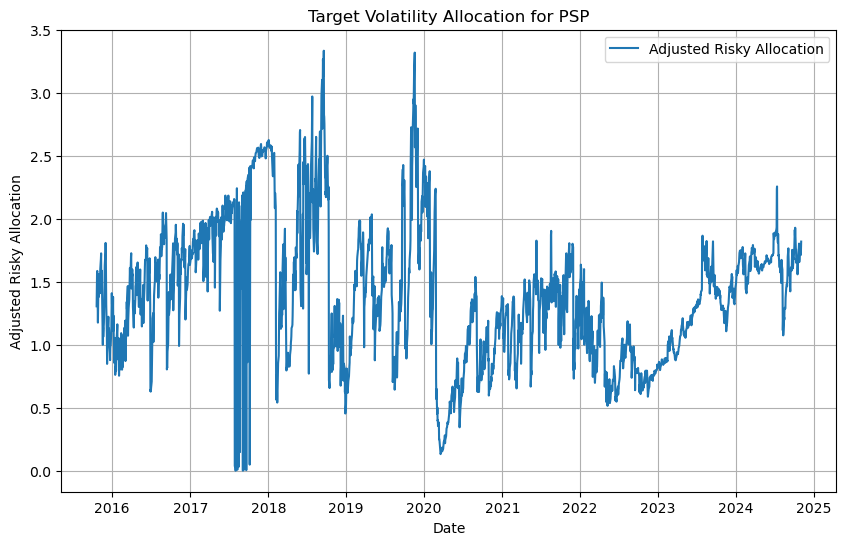

In [67]:
# Plot the adjusted risky allocation over time
plt.figure(figsize=(10, 6))
plt.plot(adjusted_allocation_df.index, adjusted_allocation_df["Adjusted Risky Allocation"], label="Adjusted Risky Allocation")
plt.title("Target Volatility Allocation for PSP")
plt.xlabel("Date")
plt.ylabel("Adjusted Risky Allocation")
plt.legend()
plt.grid(True)
plt.show()

## Exposure to Market

In [69]:
# Exposure to market: 
start_date = "2002-06-21" # if we take SPY for all
end_date = "2024-11-01"
spy_data = yf.download("SPY", start=start_date, end=end_date)
spy_data.index = pd.to_datetime(spy_data.index)
spy_data.index = pd.to_datetime(spy_data.index).tz_localize(None)
spy_data['Daily Return'] = spy_data['Adj Close'].pct_change()

spy_data = spy_data.dropna()

[*********************100%***********************]  1 of 1 completed


In [70]:
spy_data

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2002-06-24,65.512337,99.800003,100.690002,97.250000,98.610001,37169700,0.005238
2002-06-25,64.041870,97.559998,100.889999,97.540001,100.300003,33355000,-0.022446
2002-06-26,64.146919,97.720001,98.150002,95.190002,95.199997,37913600,0.001640
2002-06-27,65.269402,99.430000,99.489998,96.570000,98.500000,31616400,0.017499
2002-06-28,64.960915,98.959999,100.500000,98.879997,99.239998,28184200,-0.004726
...,...,...,...,...,...,...,...
2024-10-25,577.097656,579.039978,584.460022,578.080017,581.510010,47268200,-0.000345
2024-10-28,578.881714,580.830017,582.710022,580.520020,582.580017,30174700,0.003091


In [71]:
daily_returns_exp = daily_returns.loc["2002-06-21":"2024-11-01"]

In [72]:
daily_returns_expo = daily_returns.reindex(spy_data.index)
daily_returns_expo['SPY Daily Return'] = spy_data['Daily Return']
daily_returns_expo

,Value,Mid_cap,Momentum,Low Vol,Low Investment,High Profitability,SPY Daily Return
Date,,,,,,,
2002-06-24,-0.005837,-0.007240,-0.004528,-0.005404,-0.006265,-0.004087,0.005238
2002-06-25,-0.014299,-0.012704,-0.015621,-0.013534,-0.014611,-0.016603,-0.022446
2002-06-26,-0.008688,-0.007918,-0.003178,-0.001011,-0.004044,-0.002254,0.001640
2002-06-27,0.015050,0.013252,0.014423,0.014853,0.014373,0.015489,0.017499
2002-06-28,0.009259,0.008427,0.004909,0.004169,0.005646,0.002886,-0.004726
...,...,...,...,...,...,...,...
2024-10-25,-0.007194,-0.007578,-0.004354,-0.008119,-0.009141,-0.004143,-0.000345
2024-10-28,0.005581,0.005859,0.004126,0.004564,0.005924,0.002756,0.003091
2024-10-29,-0.005922,-0.004116,-0.002218,-0.004573,-0.004336,-0.002383,0.001618


In [73]:
exposure_to_mkt = daily_returns_expo.rolling(window=21).corr(daily_returns_expo['SPY Daily Return'])
exposure_to_mkt = exposure_to_mkt.drop(columns=['SPY Daily Return']) # we drop it to plot thereafter

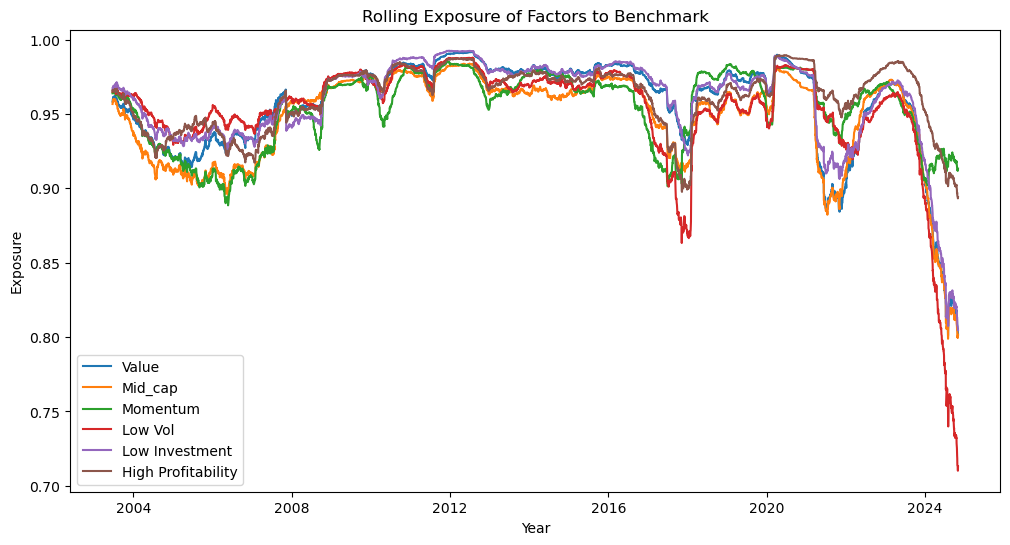

In [135]:
plt.figure(figsize=(12, 6))
for column in exposure_to_mkt.columns:
    plt.plot(exposure_to_mkt.index, exposure_to_mkt[column], label=column)
plt.legend()
plt.title("Rolling Exposure of Factors to Benchmark")
plt.xlabel("Year")
plt.ylabel("Exposure")
plt.show()

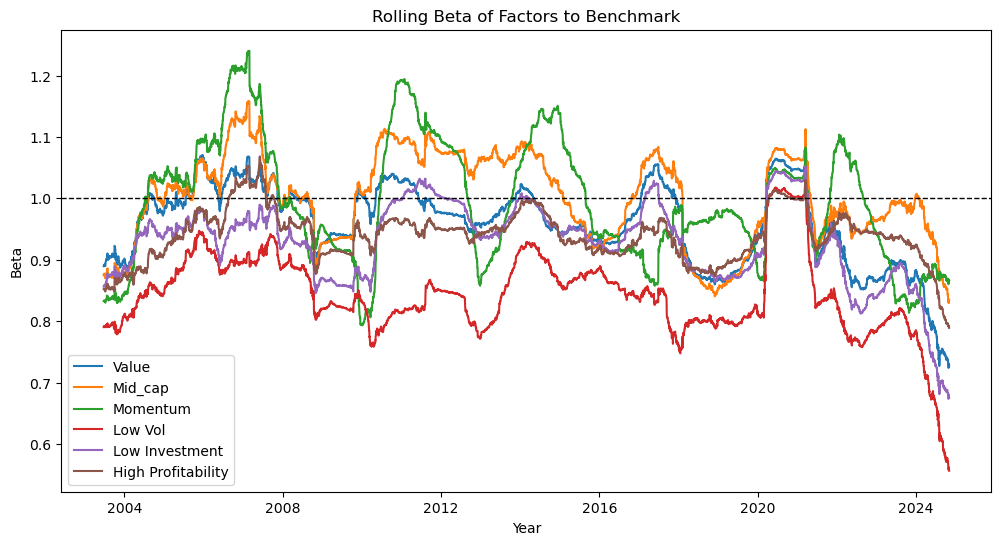

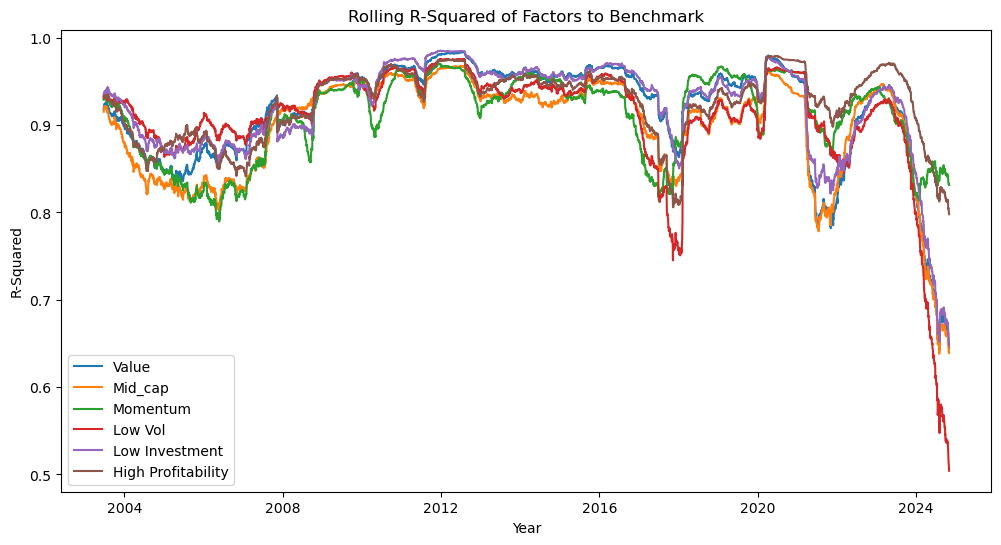

In [129]:
import statsmodels.api as sm
window_size = 252

# Create empty DataFrames to store results
rolling_beta = pd.DataFrame(index=daily_returns_expo.index, columns=daily_returns_expo.columns[:-1])
rolling_r2 = pd.DataFrame(index=daily_returns_expo.index, columns=daily_returns_expo.columns[:-1])

# Compute rolling beta + R-squared
for factor in daily_returns_expo.columns[:-1]:
    for i in range(window_size, len(daily_returns_expo)):
        # Select rolling window data
        y = daily_returns_expo[factor].iloc[i - window_size:i]
        X = daily_returns_expo['SPY Daily Return'].iloc[i - window_size:i]
        
        # Add constant for intercept
        X = sm.add_constant(X)
        
        # Run OLS regression
        model = sm.OLS(y, X).fit()
        
        # Store beta (slope) and R-squared
        rolling_beta.loc[daily_returns_expo.index[i], factor] = model.params[1]  # Beta
        rolling_r2.loc[daily_returns_expo.index[i], factor] = model.rsquared     # R-squared

# Convert results to numeric type
rolling_beta = rolling_beta.astype(float)
rolling_r2 = rolling_r2.astype(float)

# Plot Rolling Beta
plt.figure(figsize=(12, 6))
for factor in rolling_beta.columns:
    plt.plot(rolling_beta.index, rolling_beta[factor], label=factor)
plt.axhline(1, color='black', linewidth=1, linestyle='dashed')
plt.legend()
plt.title("Rolling Beta of Factors to Benchmark")
plt.xlabel("Year")
plt.ylabel("Beta")
plt.show()

# Plot Rolling R-Squared
plt.figure(figsize=(12, 6))
for factor in rolling_r2.columns:
    plt.plot(rolling_r2.index, rolling_r2[factor], label=factor)
plt.legend()
plt.title("Rolling R-Squared of Factors to Benchmark")
plt.xlabel("Year")
plt.ylabel("R-Squared")
plt.show()

<u><b>Comments:</b></u>
1. Betas
- Momentum & Mid Cap factors  -> higher betas
- Low Volatility factor ->  lower beta (quite always below 1)


2. R-Squared
- Quite the same, high values for most factors with the low vol a bit lagging behind..

- Both show the returns are extremely correlated to SPY...